## Part - 2: Drug Recommendation with MediAI

### Dataset
The dataset used for drug recommendation includes the following columns:

- **Drug**: Names of different drugs.
- **Disease**: The corresponding disease or condition the drug is recommended for.
- **Gender**: Gender of the patient.
- **Age**: Age of the patient.


In [96]:
# Importing the Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step-1 : Data Loading

In [97]:
dataset = pd.read_csv('Drug.csv')

## Step 2 : Exploratory Data Analysis 

Exploratory Data Analysis (EDA) is a critical phase in any data science project, including disease prediction with MediAI. In this step, we delve deeper into the dataset to understand its characteristics, identify patterns, and gain insights that will inform our modeling decisions.

In [98]:
# 2.1 No of Columns and Rows in the Dataset
dataset.shape

(4955, 4)

In [99]:
# 2.2 Information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Drug     4955 non-null   object
 1   Disease  4955 non-null   object
 2   Gender   4955 non-null   object
 3   Age      4955 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 155.0+ KB


In [100]:
# 2.3 Describe the Data
dataset.describe()

,Age
count,4955.000000
mean,26.507770
std,8.669391
min,13.000000
25%,20.000000
50%,23.000000
75%,37.000000
max,87.000000


In [101]:
#2.4 Null Values or not
dataset.isnull().sum()

Drug       0
Disease    0
Gender     0
Age        0
dtype: int64

In [102]:
# 2.5 Explore Unique Values in Categorical Columns
print("\nUnique values in categorical columns:")
for column in dataset.select_dtypes(include=['object']).columns:
    print(column, ":", dataset[column].unique())



Unique values in categorical columns:
Drug : ['A CN Gel(Topical) 20gmA CN Soap 75gm'
 'A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0.025% Gel 20gm'
 'ACGEL CL NANO Gel 15gm' ... "Zovilam Tablet 60'S"
 "Zovir 400mg Tablet 10'SZovir 200mg Tablet 10'SZovir 800mg Tablet 10'S"
 "Zovirax 250mg InjectionZovirax 200mg Tablet 5'SZovirax 800mg Tablet 5'SZovirax Syrup 100mlZovirax 400mg Tablet 10'SZovirax 30mg Eye Ointment 5gm"]
Disease : ['Acne' 'Allergy' 'Diabetes' 'Fungal infection' 'Urinary tract infection'
 'Malaria' 'Migraine' 'Hepatitis B' 'AIDS']
Gender : ['Male' 'Female']


In [103]:
# 2.6 Datatype
dataset.dtypes

Drug       object
Disease    object
Gender     object
Age         int64
dtype: object

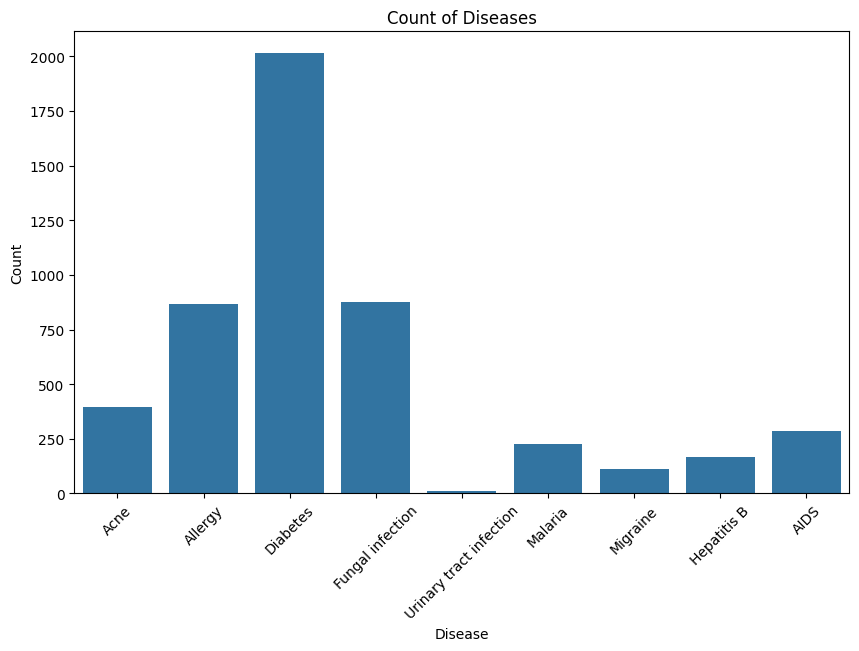

In [104]:
# 2.7 Count plot for Disease
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Disease')
plt.title('Count of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

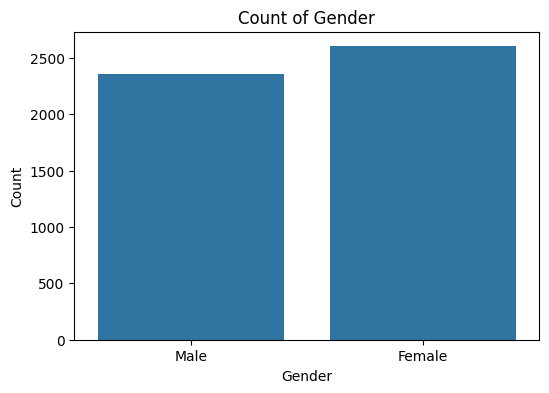

In [105]:

# 2.8 Count plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

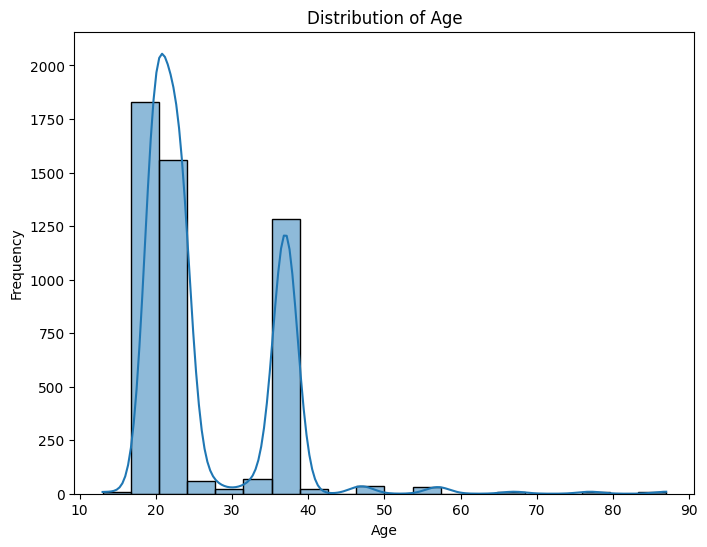

In [106]:
# 2.9 Distribution plot for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Step-3: Data Preprocessing

In [107]:
## Data Preprocessing
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Convert 'Disease' to integers
dataset['Disease'] = label_encoder.fit_transform(dataset['Disease'])
# Convert 'Gender' to integers
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

### Step-4: Spliting the Dataset into Training and Testing 

In [108]:
# Step 1: Split the Data
X = dataset[['Disease', 'Gender', 'Age']]
y = dataset['Drug']

In [109]:
X.head()

,Disease,Gender,Age
0,1,1,23
1,1,1,23
2,1,1,23
3,1,1,23
4,1,1,23


In [110]:
y.head()

0                 A CN Gel(Topical) 20gmA CN Soap 75gm
1    A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...
2                               ACGEL CL NANO Gel 15gm
3                                  ACGEL NANO Gel 15gm
4                                Acleen 1% Lotion 25ml
Name: Drug, dtype: object

In [111]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42)

### Step-5 : Machine Learning Model Training

### 5. 1 Random Forest Classifier Machine Learning Model

In [112]:
# Training the Model and fitting the dataset
from sklearn.ensemble import RandomForestClassifier
# Choose a model (e.g., Random Forest Classifier)
recommendation_model= RandomForestClassifier()
# Train the model
recommendation_model.fit(X, np.ravel(y))

RandomForestClassifier()

In [113]:
# Predicting the Accuracy
from sklearn.metrics import accuracy_score
y_pred = recommendation_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.05852674066599395


In [114]:
# Saving the best Model
import joblib
joblib.dump(recommendation_model, r'Recommendation_Model/recommendation_system_model.pkl')


['Recommendation_Model/recommendation_system_model.pkl']

### 5.2 Naive Bayes Classifier Machine Learning Model

In [115]:
#Model Building
from sklearn.naive_bayes import GaussianNB
# Choose a model (e.g., Random Forest Classifier)
recommendation_model_1= GaussianNB()
# Train the model
recommendation_model_1.fit(X, np.ravel(y))

GaussianNB()

In [116]:
# Predicting the Test result
from sklearn.metrics import accuracy_score
y_pred_1 = recommendation_model_1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.05852674066599395


In [117]:
#Saving the model
joblib.dump(recommendation_model_1, r'Recommendation_Model/recommendation_system_model_1.pkl')


['Recommendation_Model/recommendation_system_model_1.pkl']